In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [21]:
dir = '/content/drive/MyDrive/Data Challenge/Dataset/Children/'

In [22]:
child = pd.read_csv(dir + 'all_child.csv')
kindergardens = pd.read_excel(dir + 'kindergardens.xlsx')
schools = pd.read_excel(dir + 'schools.xlsx')
colleges = pd.read_excel(dir + 'colleges.xlsx')

teachers = pd.read_excel(dir + 'teachers.xlsx')

In [23]:
teachers

,City,2019,2020,2021,2022,2023
0,Қазақстан Республикасы,338755,347052,366666,369696,361318
1,Ақмола,15417,15427,16026,16092,16478
2,Ақтөбе,17816,17975,19134,19257,20209
3,Алматы,39325,41735,44280,44494,31874
4,Атырау,11124,11502,12248,12233,12872
5,Батыс Қазақстан,14641,14602,15476,15486,15920
6,Жамбыл,25729,25986,27438,27733,28327
7,Қарағанды,20342,20575,21443,21391,17642
8,Қостанай,13846,13755,14150,14403,14297
9,Қызылорда,20220,20849,21681,21767,22935


In [24]:
# Define cities and remove specified cities from analysis
cities = child['City']

cities_to_remove = ['Абай', 'Жетісу', 'Ұлытау']
cities = cities[~np.isin(cities, cities_to_remove)]

print(cities)

0     Қазақстан Республикасы
1                     Ақмола
2                     Ақтөбе
3                     Алматы
4                     Атырау
5            Батыс Қазақстан
6                     Жамбыл
7                  Қарағанды
8                   Қостанай
9                  Қызылорда
10                 Маңғыстау
11                  Павлодар
12       Солтүстік Қазақстан
13                 Түркістан
14           Шығыс Қазақстан
15             Астана қаласы
16             Алматы қаласы
17            Шымкент қаласы
Name: City, dtype: object


In [25]:
# Drop city column from datasets for further processing
child = child.drop(columns=['City'])
kindergardens = kindergardens.drop(columns=['City'])
schools = schools.drop(columns=['City'])
colleges = colleges.drop(columns=['City'])
teachers = teachers.drop(columns=['City'])

In [26]:
# Clean numeric data function
def clean_numeric(data):
    return data.apply(lambda x: x.astype(str).str.replace(" ", "").str.replace("-", "0").str.replace(",", "").astype(float))

# Apply cleaning to each dataset
child = clean_numeric(child)
kindergardens = clean_numeric(kindergardens)
schools = clean_numeric(schools)
colleges = clean_numeric(colleges)
teachers = clean_numeric(teachers)

In [27]:
teachers

,2019,2020,2021,2022,2023
0,338755.0,347052.0,366666.0,369696.0,361318.0
1,15417.0,15427.0,16026.0,16092.0,16478.0
2,17816.0,17975.0,19134.0,19257.0,20209.0
3,39325.0,41735.0,44280.0,44494.0,31874.0
4,11124.0,11502.0,12248.0,12233.0,12872.0
5,14641.0,14602.0,15476.0,15486.0,15920.0
6,25729.0,25986.0,27438.0,27733.0,28327.0
7,20342.0,20575.0,21443.0,21391.0,17642.0
8,13846.0,13755.0,14150.0,14403.0,14297.0
9,20220.0,20849.0,21681.0,21767.0,22935.0


In [28]:
kindergardens

,2019,2020,2021,2022,2023
0,10583.0,10650.0,10871.0,11104.0,11346.0
1,609.0,601.0,599.0,603.0,601.0
2,533.0,546.0,559.0,575.0,606.0
3,1163.0,1201.0,1392.0,1142.0,1148.0
4,330.0,331.0,319.0,326.0,334.0
5,510.0,515.0,521.0,527.0,533.0
6,540.0,547.0,553.0,567.0,587.0
7,536.0,533.0,519.0,411.0,409.0
8,593.0,579.0,566.0,538.0,519.0
9,666.0,665.0,668.0,680.0,680.0


In [29]:
child.head()

child['City'] = cities
kindergardens['City'] = cities
schools['City'] = cities
colleges['City'] = cities
teachers['City'] = cities

In [30]:
# Prepare years for projection
years_past = np.array([2019, 2020, 2021, 2022, 2023])
years_future = np.array([2024, 2025, 2026, 2027, 2028, 2029])

# Create empty DataFrames to store projections
kindergardens_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])
schools_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])
colleges_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])
teachers_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])


kindergardens_proj['City'] = cities
schools_proj['City'] = cities
colleges_proj['City'] = cities
teachers_proj['City'] = cities

# Set a random seed for reproducibility
np.random.seed(42)

In [31]:
teachers

,2019,2020,2021,2022,2023,City
0,338755.0,347052.0,366666.0,369696.0,361318.0,Қазақстан Республикасы
1,15417.0,15427.0,16026.0,16092.0,16478.0,Ақмола
2,17816.0,17975.0,19134.0,19257.0,20209.0,Ақтөбе
3,39325.0,41735.0,44280.0,44494.0,31874.0,Алматы
4,11124.0,11502.0,12248.0,12233.0,12872.0,Атырау
5,14641.0,14602.0,15476.0,15486.0,15920.0,Батыс Қазақстан
6,25729.0,25986.0,27438.0,27733.0,28327.0,Жамбыл
7,20342.0,20575.0,21443.0,21391.0,17642.0,Қарағанды
8,13846.0,13755.0,14150.0,14403.0,14297.0,Қостанай
9,20220.0,20849.0,21681.0,21767.0,22935.0,Қызылорда


In [32]:
kindergardens

,2019,2020,2021,2022,2023,City
0,10583.0,10650.0,10871.0,11104.0,11346.0,Қазақстан Республикасы
1,609.0,601.0,599.0,603.0,601.0,Ақмола
2,533.0,546.0,559.0,575.0,606.0,Ақтөбе
3,1163.0,1201.0,1392.0,1142.0,1148.0,Алматы
4,330.0,331.0,319.0,326.0,334.0,Атырау
5,510.0,515.0,521.0,527.0,533.0,Батыс Қазақстан
6,540.0,547.0,553.0,567.0,587.0,Жамбыл
7,536.0,533.0,519.0,411.0,409.0,Қарағанды
8,593.0,579.0,566.0,538.0,519.0,Қостанай
9,666.0,665.0,668.0,680.0,680.0,Қызылорда


In [58]:
# Perform linear regression with random noise for each city and each parameter
for city in cities:
    # Extract historical data for birth, death, and migration rates

    child_city = child[child['City'] == city].iloc[:, :-1].values.flatten()
    kindergardens_city = kindergardens[kindergardens['City'] == city].iloc[:, :-1].values.flatten()
    schools_city = schools[schools['City'] == city].iloc[:, :-1].values.flatten()
    colleges_city = colleges[colleges['City'] == city].iloc[:, :-1].values.flatten()

    teachers_city = teachers[teachers['City'] == city].iloc[:, :-1].values.flatten()
    # Reshape years data for linear regression model
    X = years_past.reshape(-1, 1)

    for i in range(len(years_past)):
      kindergardens_city[i] = 10000 * kindergardens_city[i]/child_city[i]
      schools_city[i] = 10000 * schools_city[i]/child_city[i]
      colleges_city[i] = 10000 * colleges_city[i]/child_city[i]
      teachers_city[i] = 10000 * teachers_city[i]/child_city[i]

    kindergardens_model = LinearRegression().fit(X, kindergardens_city)
    kindergardens_predictions = kindergardens_model.predict(years_future.reshape(-1, 1))
    kindergardens_predictions_noisy = kindergardens_predictions + np.random.uniform(0, 0.05, size=len(kindergardens_predictions)) * kindergardens_predictions
    kindergardens_proj.loc[kindergardens_proj['City'] == city, years_future] = np.round(kindergardens_predictions_noisy)

    schools_model = LinearRegression().fit(X, schools_city)
    schools_predictions = schools_model.predict(years_future.reshape(-1, 1))
    schools_predictions_noisy = schools_predictions + np.random.uniform(0, 0.05, size=len(schools_predictions)) * schools_predictions
    schools_proj.loc[schools_proj['City'] == city, years_future] = np.round(schools_predictions_noisy)

    colleges_model = LinearRegression().fit(X, colleges_city)
    colleges_predictions = colleges_model.predict(years_future.reshape(-1, 1))
    colleges_predictions_noisy = colleges_predictions + np.random.uniform(0, 0.05, size=len(colleges_predictions)) * colleges_predictions
    colleges_proj.loc[colleges_proj['City'] == city, years_future] = np.round(colleges_predictions_noisy)

    teachers_model = LinearRegression().fit(X, teachers_city)
    teachers_predictions = teachers_model.predict(years_future.reshape(-1, 1))
    teachers_predictions_noisy = teachers_predictions + np.random.uniform(0, 0.05, size=len(teachers_predictions)) * teachers_predictions
    teachers_proj.loc[teachers_proj['City'] == city, years_future] = np.round(teachers_predictions_noisy)

In [56]:
schools_proj

,City,2024,2025,2026,2027,2028,2029
0,Қазақстан Республикасы,13.0,12.0,12.0,12.0,11.0,12.0
1,Ақмола,29.0,28.0,27.0,27.0,26.0,25.0
2,Ақтөбе,16.0,16.0,16.0,16.0,16.0,16.0
3,Алматы,11.0,10.0,10.0,10.0,9.0,9.0
4,Атырау,9.0,10.0,10.0,10.0,10.0,11.0
5,Батыс Қазақстан,20.0,21.0,20.0,20.0,20.0,20.0
6,Жамбыл,13.0,13.0,13.0,13.0,14.0,14.0
7,Қарағанды,16.0,16.0,16.0,16.0,16.0,16.0
8,Қостанай,26.0,26.0,24.0,24.0,24.0,23.0
9,Қызылорда,12.0,12.0,12.0,12.0,12.0,13.0


In [59]:
all_kindergardens = pd.concat([kindergardens, kindergardens_proj])
all_schools = pd.concat([schools, schools_proj])
all_colleges = pd.concat([colleges, colleges_proj])
all_teachers = pd.concat([teachers, teachers_proj])

In [60]:
all_kindergardens.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_kindergardens.csv', index=False)
all_schools.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_schools.csv', index=False)
all_colleges.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_colleges.csv', index=False)
all_teachers.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_teachers.csv', index=False)

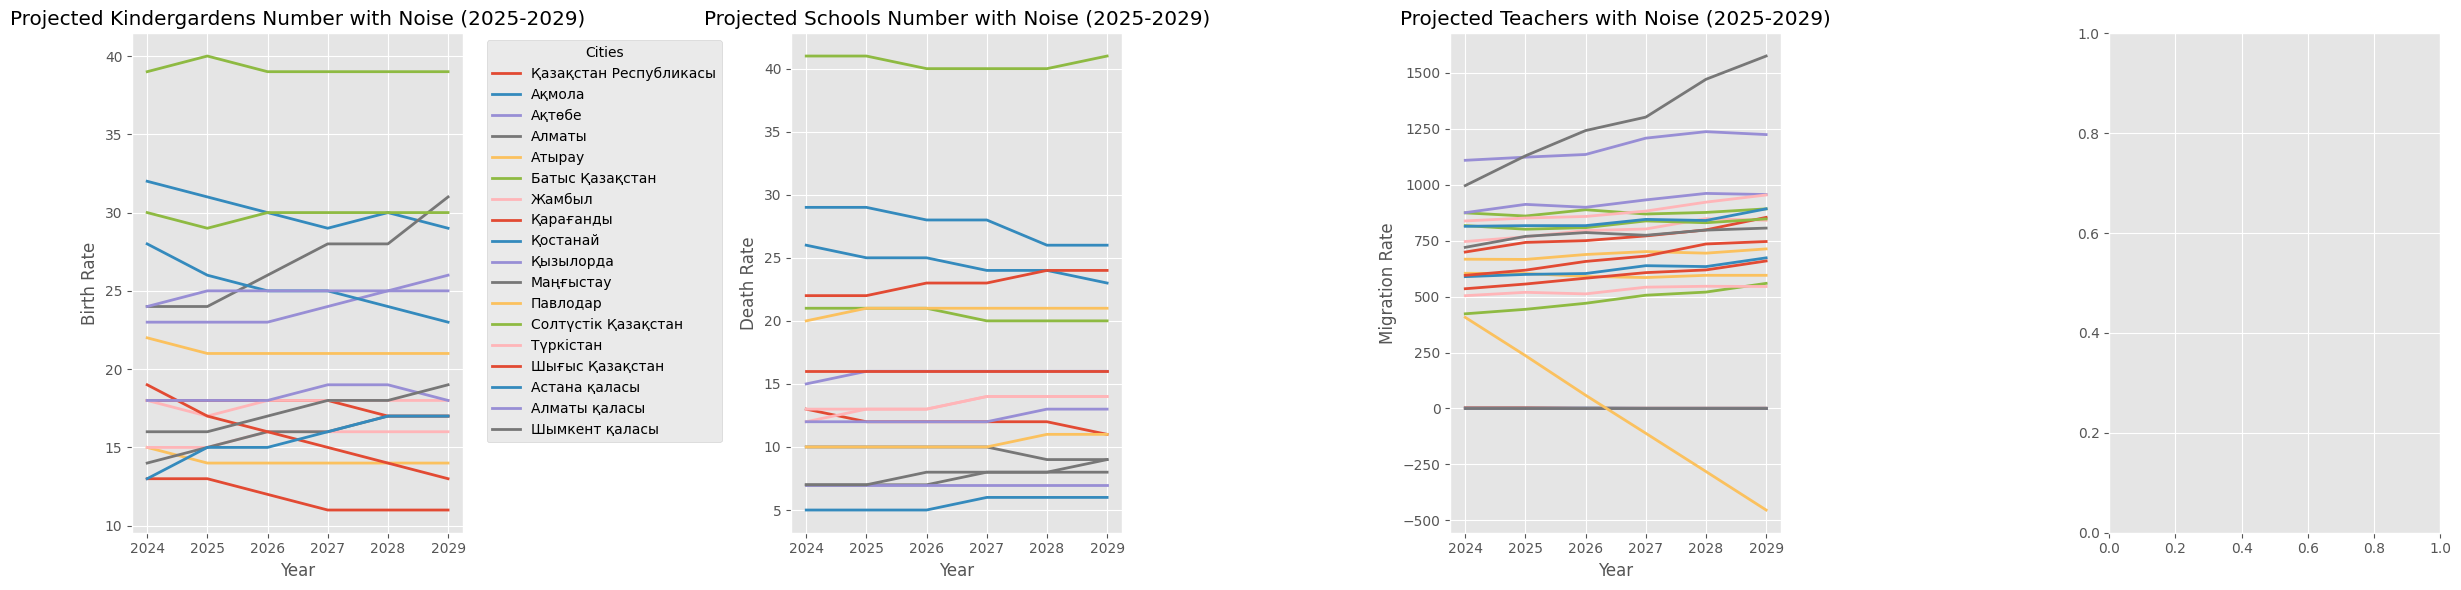

In [61]:
# Optional: Plot projections for each rate with noise
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Plot birth projections with noise
for city in cities:
    data = kindergardens_proj[kindergardens_proj['City'] == city]
    axes[0].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[0].set_title("Projected Kindergardens Number with Noise (2025-2029)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Birth Rate")
axes[0].legend(title="Cities", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Plot death projections with noise
for city in cities:
    data = schools_proj[schools_proj['City'] == city]
    axes[1].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[1].set_title("Projected Schools Number with Noise (2025-2029)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Death Rate")

# Plot migration projections with noise
for city in cities:
    data = colleges_proj[colleges_proj['City'] == city]
    axes[2].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[2].set_title("Projected Colleges with Noise (2025-2029)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Migration Rate")

for city in cities:
    data = teachers_proj[teachers_proj['City'] == city]
    axes[2].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[2].set_title("Projected Teachers with Noise (2025-2029)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Migration Rate")

# Improve layout and display plot
plt.tight_layout()
plt.show()
